First read in the main survey dataset of Stack Overflow

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import HowToBreakIntoTheField as t
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset is huge with many columns, to understand about the data in each column I know that I have to refer to the schema data

In [2]:
schema = pd.read_csv('./survey_results_schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


1st question: What programing language were most popular in this year? - I want to know what columns contain the information about language

In [3]:
print(schema[schema['Column'].str.contains("Language")])

                Column                                           Question
88  HaveWorkedLanguage  Which of the following languages have you done...
89    WantWorkLanguage  Which of the following languages have you done...


So I know that I have data about the programing language in 2 columns "HaveWorkedLanguage" and "WantWorkLanguage"

In [4]:
df.WantWorkLanguage.value_counts()

JavaScript                                              642
Python                                                  556
Java                                                    544
C#                                                      475
C#; JavaScript; SQL                                     444
                                                       ... 
Clojure; Go; JavaScript; Python; R; Ruby; TypeScript      1
Go; Python; Ruby; SQL; Swift                              1
C#; Java; JavaScript; Lua; Objective-C; SQL               1
Assembly; C#; Rust; Scala                                 1
Erlang; F#; Python; R                                     1
Name: WantWorkLanguage, Length: 11239, dtype: int64

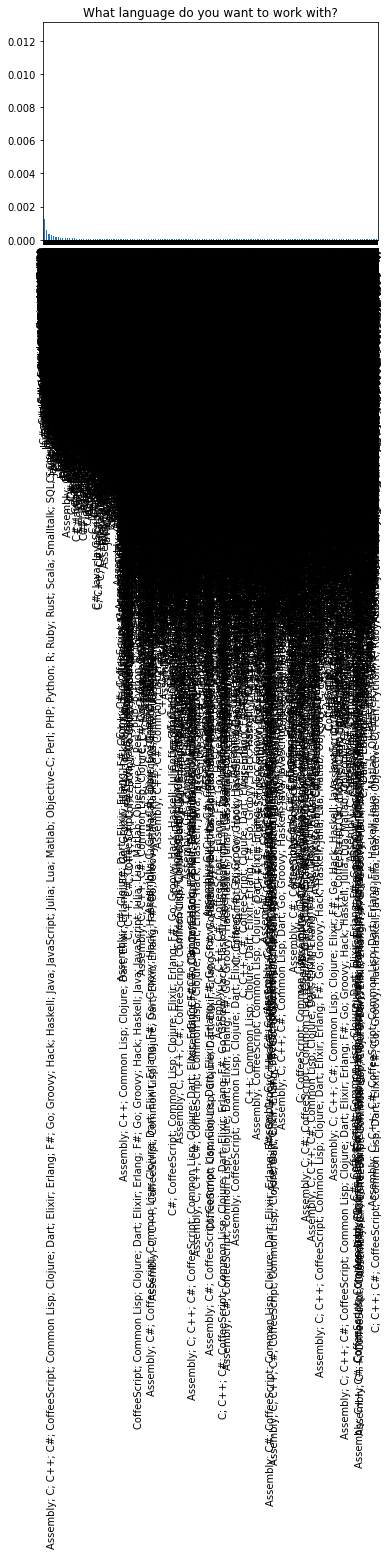

In [5]:
val_wantlanguage = df.WantWorkLanguage.value_counts()
(val_wantlanguage/df.shape[0]).plot(kind="bar");
plt.title("What language do you want to work with?");

So I see that I need to clean the data of WantWorkLanguage column to get the anwswer for the question: what programing language is the most popular?.
The counting value for each language need to be consolidated.

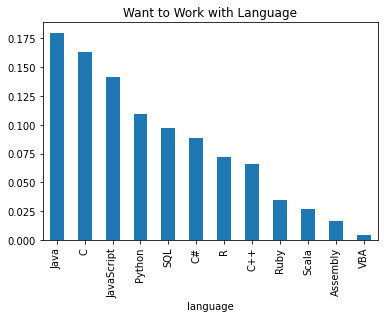

In [11]:
possible_vals = ["JavaScript", "Python", 
                 "Java", "C", "C#",
                 "SQL", "Assembly", "C++",
                 "R", "Scala",
                 "Ruby", "VBA", "Other"]

def clean_and_plot(df, title='Want to Work with Language', plot=True):
    '''
    INPUT 
        df - a dataframe holding the WantWorkLanguage column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the WantWorkLanguage column.
    '''
    study = df['WantWorkLanguage'].value_counts().reset_index()
    study.rename(columns={'index': 'language', 'WantWorkLanguage': 'count'}, inplace=True)
    study_df = t.total_count(study, 'language', 'count', possible_vals)

    study_df.set_index('language', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

So the most wanted language the developers want to work with is Java. Let see also HaveWorkedLanguage.

In [10]:
df.HaveWorkedLanguage.value_counts()

C#; JavaScript; SQL                                      1276
JavaScript; PHP; SQL                                     1143
Java                                                      913
JavaScript                                                807
JavaScript; PHP                                           662
                                                         ... 
C; C++; JavaScript; Matlab; Python; R; TypeScript           1
C++; Go; Java; JavaScript; Perl; Python                     1
C; C++; JavaScript; Lua; Perl; PHP; Python; Ruby; SQL       1
Assembly; C; C++; C#; Matlab; VB.NET                        1
C++; Python; R; Ruby; Scala; SQL                            1
Name: HaveWorkedLanguage, Length: 8438, dtype: int64

The same clean need to be done for HaveWorkedLanguage

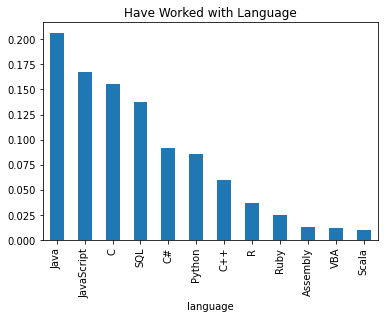

In [12]:
possible_vals = ["JavaScript", "Python", 
                 "Java", "C", "C#",
                 "SQL", "Assembly", "C++",
                 "R", "Scala",
                 "Ruby", "VBA", "Other"]

def clean_and_plot(df, title='Have Worked with Language', plot=True):
    '''
    INPUT 
        df - a dataframe holding the HaveWorkedLanguage column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the HaveWorkedLanguage column.
    '''
    study = df['HaveWorkedLanguage'].value_counts().reset_index()
    study.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)
    study_df = t.total_count(study, 'language', 'count', possible_vals)

    study_df.set_index('language', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

Java is also the most popular language that the developers have worked with

In [13]:
df['HaveWorkedLanguage'].str.contains("Java").value_counts()/df.shape[0]

True     0.547731
False    0.164928
Name: HaveWorkedLanguage, dtype: float64

In [14]:
df['WantWorkLanguage'].str.contains("Java").value_counts()/df.shape[0]

True     0.403506
False    0.253619
Name: WantWorkLanguage, dtype: float64

The above results also show that Java is so popular, nearly 5/6 among the group answered about HaveWorkedLanguage have worked with Java (see the ratio of True vs False) and more than 2/3 (see the ratio of True vs False) among the group anwsered about WantWorkLanguage want to work with it.

2nd question: who have the higher salary btw the developers with and without the most popular language Java (have worked with Java or not)?

In [15]:
df[df['HaveWorkedLanguage'].str.contains("Java")==True]['Salary'].mean()

56094.37671072892

In [16]:
df[df['HaveWorkedLanguage'].str.contains("Java")==False]['Salary'].mean()

60523.83649779653

In [17]:
df[df['WantWorkLanguage'].str.contains("Java")==True]['Salary'].mean()

54915.35810067917

In [18]:
df[df['WantWorkLanguage'].str.contains("Java")==False]['Salary'].mean()

60388.88793015687

So I can see that the developers who want to work with Java or who have worked with Java have lower salary than the developers don't have relationship with Java. 
It's understandable, Java is most popular language so it cannot help the developers get higher salary. To get higher salary the developers need to master the more specific languages.

In [22]:
df.groupby(['HaveWorkedLanguage'])['Salary'].mean()

HaveWorkedLanguage
Assembly                                                                                                                                101809.954751
Assembly; C                                                                                                                              26382.440394
Assembly; C#                                                                                                                             37276.397262
Assembly; C#; Clojure                                                                                                                             NaN
Assembly; C#; CoffeeScript; Dart; Go; Haskell; Java; JavaScript; Lua; Matlab; PHP; Python; R; Ruby; Rust; Smalltalk; SQL; TypeScript              NaN
                                                                                                                                            ...      
VB.NET; VBA; Visual Basic 6                                                      

In [23]:
df.groupby(['WantWorkLanguage'])['Salary'].mean()

WantWorkLanguage
Assembly                                                                                                                                                    56670.324150
Assembly; C                                                                                                                                                 58582.312455
Assembly; C#                                                                                                                                                55000.000000
Assembly; C#; Clojure; Dart; Elixir; Erlang; F#; Groovy; Hack; Julia; Lua; Matlab; Objective-C; Rust; Scala; Smalltalk; TypeScript; VBA; Visual Basic 6              NaN
Assembly; C#; Clojure; Dart; Groovy; Ruby; Scala                                                                                                                     NaN
                                                                                                                                          

So I can confirm my conlusion about the higher salary should come from more difficult languages. With the above sorted result of mean salary with WantWorkLanguage and HaveWorkedLanguage, the highest salary should be earned with the language like Assembly, C, C#.

So for the 2nd question: who have the higher salary btw the developers with and without the most popular language?
The anwser is that: the developers with skill of the popular language have lower salary than the developers without skill with the popular language. 